# Random Forest for Regression

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.

Source: https://en.wikipedia.org/wiki/Random_forest

## Read in Data

In [49]:
import pandas as pd

# set pandas display options
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',50)
pd.set_option('display.width',1000)

# read csv
rbwrte_df = pd.read_csv("rbwrte_feature_matrix.csv")

# create list of player specific columns
player_columns = ['year'
                 ,'week'
                 ,'player'
                 ,'short_name'
                 ,'position_name'
                 ,'pro_team'
                 ,'pro_team_abv'
                 ]

# create list of feature matrix columns
rbwrte_fx = ['rush_yrd'
            ,'rush_td'
            ,'rush_2pt_con'
            ,'receptions'
            ,'rec_yrd'
            ,'rec_td'
            ,'rec_2pt_con'
            ,'fum_lost'
            ,'yrd_per_rush'
            ,'total_off_share'
            ,'yrd_per_catch'
            ,'yards_after_catch'
            ,'racr'
            ,'adot'
            ,'wopr'
            ,'actual_points'
            ]

# filter out players with no rushing attempts and no catches 
rbwrte_df = rbwrte_df.loc[(rbwrte_df['rush_att'] >= 1) | (rbwrte_df['receptions'] >= 1)]

# select relevant columns
rbwrte_df = rbwrte_df[player_columns + rbwrte_fx]

print(rbwrte_df.shape)
rbwrte_df.head(3)

(6038, 23)


,year,week,player,short_name,position_name,pro_team,pro_team_abv,rush_yrd,rush_td,rush_2pt_con,receptions,rec_yrd,rec_td,rec_2pt_con,fum_lost,yrd_per_rush,total_off_share,yrd_per_catch,yards_after_catch,racr,adot,wopr,actual_points
0,2018,1,David Johnson,D.Johnson,RB,Arizona Cardinals,ARI,37.0,1.0,0.0,5.0,30.0,0.0,0.0,0.0,4.111111,0.28,6.000000,20.0,4.285714,0.777778,0.409272,15.8
1,2018,1,Melvin Gordon,M.Gordon,RB,Los Angeles Chargers,LAC,64.0,0.0,1.0,9.0,102.0,0.0,0.0,0.0,4.000000,0.32,11.333333,119.0,-6.375000,-1.230769,0.351812,27.8
2,2018,1,Rob Gronkowski,R.Gronkowski,TE,New Engalnd Patriots,NE,0.0,0.0,0.0,7.0,123.0,1.0,0.0,1.0,0.000000,0.00,17.571429,21.0,1.149533,13.375000,0.541755,24.2


In [16]:
# read csv
qb_df = pd.read_csv("qb_feature_matrix.csv")

# create list of feature matrix columns
qb_fx = ['pass_comp'
        ,'pass_incomp'
        ,'pass_yrd'
        ,'pass_td'
        ,'pass_2pt_con'
        ,'pass_int'
        ,'rush_yrd'
        ,'rush_td'
        ,'rush_2pt_con'
        ,'fum_lost'
        ,'air_yrd_per_att'
        ,'adj_net_yrd_per_att'
        ,'yrd_per_rush'
        ,'rush_share'
        ,'qb_hit'
        ,'sack'
        ,'pass_yrd_300_399_ff'
        ,'pass_yrd_400+_ff'
        ,'pass_50_yrd_td_ff'
        ,'rush_yrd_100_199_ff'
        ,'rush_50_yrd_td_ff'
        ,'actual_points'
        ]

# filter players with no passing attempts
qb_df = qb_df.loc[(qb_df['pass_comp'] >= 1) | (qb_df['pass_incomp'] >= 1)]

# select relevant columns
qb_df = qb_df[player_columns + qb_fx]

print(qb_df.shape)
qb_df.head(3)

(1001, 29)


,year,week,player,short_name,position_name,pro_team,pro_team_abv,pass_comp,pass_incomp,pass_yrd,...,yrd_per_rush,rush_share,qb_hit,sack,pass_yrd_300_399_ff,pass_yrd_400+_ff,pass_50_yrd_td_ff,rush_yrd_100_199_ff,rush_50_yrd_td_ff,actual_points
0,2018,1,Matthew Stafford,M.Stafford,QB,Detroit Lions,DET,27.0,19.0,286.0,...,6.000000,0.066667,4.0,0.0,0.0,0.0,0.0,0.0,0.0,11.3
1,2018,1,Ben Roethlisberger,B.Roethlisberger,QB,Pittsburgh Steelers,PIT,23.0,18.0,335.0,...,5.333333,0.085714,5.0,4.0,3.0,0.0,0.0,0.0,0.0,13.1
2,2018,1,Matt Ryan,M.Ryan,QB,Atlanta Falcons,ATL,21.0,22.0,251.0,...,4.000000,0.111111,13.0,4.0,0.0,0.0,0.0,0.0,0.0,7.6


In [17]:
# read csv
def_df = pd.read_csv("def_feature_matrix.csv")

# create list of feature matrix columns
def_fx = ['def_pts_alw'
         ,'def_tot_yrd_alw'
         ,'total_to'
         ,'def_st_sack'
         ,'def_st_safety'
         ,'def_st_blk_kick'
         ,'def_st_int_td'
         ,'def_st_fum_ret_td'
         ,'def_st_blk_td'
         ,'def_st_kick_ret_td'
         ,'def_st_punt_ret_td'
         ,'rush_yrd_gained_agst'
         ,'rush_td_agst'
         ,'inc_pass_agst'
         ,'comp_pass_agst'
         ,'yac_agst'
         ,'pass_td_agst'
         ,'plays_agst'
         ,'compl_perc_agst'
         ,'yrd_per_play_agst'
         ,'racr_agst'
         ,'adot_agst'
         ,'adj_net_yrd_per_att_agst'
         ,'td_rate_agst'
         ,'int_to_td_ratio_agst'
         ,'sack_yrd'
         ,'penalty_yards'
         ,'tot_drives_agst'
         ,'qb_hit_agst'
         ,'actual_points'
         ]

# filter for defenses with no rushing or passing attempts against
def_df = def_df.loc[(def_df['rush_att_agst'] >= 1) | (def_df['inc_pass_agst'] >= 1) | (def_df['comp_pass_agst'] >= 1)]

# select relevant columns
def_df = def_df[player_columns + def_fx]

print(def_df.shape)
def_df.head(3)

(837, 37)


,year,week,player,short_name,position_name,pro_team,pro_team_abv,def_pts_alw,def_tot_yrd_alw,total_to,...,racr_agst,adot_agst,adj_net_yrd_per_att_agst,td_rate_agst,int_to_td_ratio_agst,sack_yrd,penalty_yards,tot_drives_agst,qb_hit_agst,actual_points
0,2018,1,Jaguars D/ST,J.D/ST,DEF,Jacksonville Jaguars,JAX,15.0,324.0,1.0,...,0.843373,6.916667,5.236842,0.031746,1.0,-14.0,73.0,12.0,6.0,21.0
1,2018,1,Ravens D/ST,R.D/ST,DEF,Baltimore Ravens,BAL,3.0,153.0,2.0,...,0.190217,11.870968,0.216216,0.000000,0.0,-28.0,38.0,15.0,9.0,26.0
2,2018,1,Vikings D/ST,V.D/ST,DEF,Minnesota Vikings,MIN,16.0,327.0,3.0,...,0.644022,12.266667,5.030303,0.032787,1.5,-24.0,37.0,12.0,8.0,25.0


In [18]:
# read csv
kr_df = pd.read_csv("kr_feature_matrix.csv")

# create list of feature matrix columns
kr_fx = ['pat_con'
        ,'fg_con'
        ,'pat_perc'
        ,'fg_perc'
        ,'kick_perc'
        ,'total_plays'
        ,'total_yards'
        ,'total_scores'
        ,'total_scores_rz'
        ,'pat_miss_ff'
        ,'fg_made_0_39_ff'
        ,'fg_miss_0_39_ff'
        ,'fg_made_40_49_ff'
        ,'fg_miss_40_49_ff'
        ,'fg_made_50_59_ff'
        ,'actual_points'
        ]

# filter for defenses with no rushing or passing attempts against
kr_df = kr_df.loc[(kr_df['pat_con'] >= 1)  | (kr_df['pat_att'] >= 1) | (kr_df['fg_con'] >= 1) | (kr_df['fg_att'] >= 1)]

# select relevant columns
kr_df = kr_df[player_columns + kr_fx]

print(kr_df.shape)
kr_df.head(3)

(542, 23)


,year,week,player,short_name,position_name,pro_team,pro_team_abv,pat_con,fg_con,pat_perc,...,total_yards,total_scores,total_scores_rz,pat_miss_ff,fg_made_0_39_ff,fg_miss_0_39_ff,fg_made_40_49_ff,fg_miss_40_49_ff,fg_made_50_59_ff,actual_points
0,2018,1,Chris Boswell,C.Boswell,KR,Pittsburgh Steelers,PIT,3.0,0.0,1.0,...,472.0,3.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,2.0
1,2018,1,Harrison Butker,H.Butker,KR,Kansas City Chiefs,KC,5.0,1.0,1.0,...,362.0,5.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,9.0
2,2018,1,Matt Prater,M.Prater,KR,Detroit Lions,DET,2.0,1.0,1.0,...,339.0,4.0,1.0,0.0,3.0,0.0,0.0,-1.0,0.0,4.0


## Create Train Data for Hyperparameter Tuning

In [2]:
# function to create train data for hyperparameter tuning
def create_train_data(data, columns):
    '''
    Function to evaluate and plot hyperparameter tuning result using RepeatedKFold 10-fold cross validation
    
    param data: pandas dataframe
    param columns: list of feature matrix variables
    
    returns: pandas dataframe containing feature matrix
             pandas series containing target variable
    '''
    
    # filter out current year data and randomly change row order
    x_train = data.loc[(data['year'] != data['year'].max())].sample(frac = 1)

    # create train target variable
    y_train = data['actual_points']

    # create train feature matrix
    x_train = data.loc[:, columns[:-1]]
    
    print('x_train shape: {}'.format(x_train.shape))
    print('y_train length: {}'.format(len(y_train)))
    
    return x_train, y_train

In [3]:
x_train_rbwrte, y_train_rbwrte = create_train_data(rbwrte_df, rbwrte_fx)

x_train shape: (6038, 15)
y_train length: 6038


In [69]:
x_train_qb, y_train_qb = create_train_data(qb_df, qb_fx)

x_train shape: (1001, 21)
y_train length: 1001


In [70]:
x_train_def, y_train_def = create_train_data(def_df, def_fx)

x_train shape: (837, 29)
y_train length: 837


In [71]:
x_train_kr, y_train_kr = create_train_data(kr_df, kr_fx)

x_train shape: (542, 15)
y_train length: 542


## Create Function to Evaluate & Visualize Hyperparameter Tuning Results

In [31]:
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

# function to evaluate and plot hyperparameter tuning results
def plot_param_tuning_regression(X, y, hyperparameter_func):
    '''
    Function to evaluate and plot hyperparameter tuning result using RepeatedKFold 10-fold cross validation
    
    param data_func: function to generate data
    param hyperparameter_func: function to generate multiple regression models using various hyperparameter settings
    
    returns: mean and standard deviation of the cross validation scores
             box plot to visualize the results 
    '''

#     # generate data
#     X, y = data_func

    # generate models to evaluate
    models = hyperparameter_func
    
    # define Repeated K-Fold cross validator
    cv = RepeatedKFold(n_splits=10, 
                       n_repeats=3, 
                       random_state=1
                      )
    
    # evaluate the models and store results
    results, names = list(), list()
    for name, model in models.items():
        
        # calculate cross validation scores
        scores = cross_val_score(model, X, y, 
                                 scoring='neg_mean_absolute_error', 
                                 cv=cv, 
                                 n_jobs=-1, 
                                 error_score='raise'
                                )

        # store the results
        results.append(scores)
        names.append(name)
        
        # summarize the performance along the way
        print('>%s MAE: %.3f (%.3f)' % (name, mean(scores), std(scores)))
        
    # plot model performance for comparison
    pyplot.boxplot(results, 
                   labels=names, 
                   showmeans=True
                  )
    pyplot.show()

## Create Function to Tune the max_samples Hyperparameter

If bootstrap is True, the “max_samples” argument can be set to a float between 0 and 1 to control the percentage of the size of the training dataset to make the bootstrap sample used to train each decision tree.

For example, if the training dataset has 100 rows, the max_samples argument could be set to 0.5 and each decision tree will be fit on a bootstrap sample with (100 * 0.5) or 50 rows of data.

A smaller sample size will make trees more different, and a larger sample size will make the trees more similar. Setting max_samples to “None” will make the sample size the same size as the training dataset and this is the default.

max_samples: int or float, default=None

- If None (default), then draw X.shape[0] samples.
- If int, then draw max_samples samples.
- If float, then draw max_samples * X.shape[0] samples. Thus, max_samples should be in the interval (0, 1).

Sources: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;https://machinelearningmastery.com/random-forest-ensemble-in-python/

In [32]:
from sklearn.ensemble import RandomForestRegressor

# function to generate a dictionary of regression models to evaluate
def tune_max_samples_regression():
    '''
    Function to generate regression models to tune the max_samples hyperparameter
    
    returns: dictionary of regression models
    '''
    
    models = dict()
    
    # explore ratios from 10% to 100% in 10% increments
    for i in arange(0.1, 1.1, 0.1):
        key = '%.1f' % i
        
        # set max_samples=None to use 100%
        if i == 1.0:
            i = None
        models[key] = RandomForestRegressor(max_samples=i)
    return models

The scikit-learn library makes the MAE negative so that it is maximized instead of minimized. This means that larger negative MAE are better and a perfect model has a MAE of 0.

Source: https://machinelearningmastery.com/random-forest-ensemble-in-python/

>0.1 MAE: -0.982 (0.091)
>0.2 MAE: -0.784 (0.075)
>0.3 MAE: -0.708 (0.072)
>0.4 MAE: -0.667 (0.059)
>0.5 MAE: -0.647 (0.062)
>0.6 MAE: -0.630 (0.058)
>0.7 MAE: -0.615 (0.059)
>0.8 MAE: -0.608 (0.056)
>0.9 MAE: -0.603 (0.056)
>1.0 MAE: -0.600 (0.058)


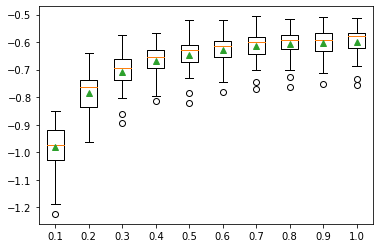

Wall time: 2min 32s


In [57]:
%%time

# run function to evaluate the max_samples hyperparameter
plot_param_tuning_regression(x_train_rbwrte, y_train_rbwrte, tune_max_samples_regression())

In [ ]:
%%time

# run function to evaluate the max_samples hyperparameter
plot_param_tuning_regression(x_train_qb, y_train_qb, tune_max_samples_regression())

In [ ]:
%%time

# run function to evaluate the max_samples hyperparameter
plot_param_tuning_regression(x_train_def, y_train_def, tune_max_samples_regression())

In [ ]:
%%time

# run function to evaluate the max_samples hyperparameter
plot_param_tuning_regression(x_train_kr, y_train_kr, tune_max_samples_regression())

## Create Function to Tune the max_features Hyperparameter

The number of random features to consider when looking for the best split and is perhaps the most important feature to configure for random forest.

max_features: {“auto”, “sqrt”, “log2”}, int or float, default=”auto”

- If int, then consider max_features features at each split.
- If float, then max_features is a fraction and round(max_features * n_features) features are considered at each split.
- If “auto”, then max_features=n_features.
- If “sqrt”, then max_features=sqrt(n_features).
- If “log2”, then max_features=log2(n_features).
- If None, then max_features=n_features.

Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.

Sources: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;https://machinelearningmastery.com/random-forest-ensemble-in-python/

Since max_features depends on how many features are included in the feature matrix, the **user** will need to define some range of numbers within the length  of features.

#### Please set user defined fields below

In [58]:
# set user defined fields to determine the number of random features to consider when looking for the best split
# note that the upper bound won't be included in the range
lower_bound = 5
upper_bound = 12

num_random_features = [i for i in range(lower_bound,upper_bound)]

In [59]:
# function to generate a dictionary of regression models to evaluate
def tune_max_features_regression():
    '''
    Function to generate regression models to tune the max_features hyperparameter
    
    returns: dictionary of regression models
    '''
    
    models = dict()
    
    # create list of max_features options.  No need to include None since None and "auto" are the same.
    max_features = num_random_features + ['auto', 'sqrt', 'log2']
    
    # explore different max_features options
    for i in max_features:
        models[str(i)] = RandomForestRegressor(max_features=i)
    return models

>5 MAE: -0.732 (0.067)
>6 MAE: -0.682 (0.069)
>7 MAE: -0.646 (0.062)
>8 MAE: -0.625 (0.060)
>9 MAE: -0.608 (0.057)
>10 MAE: -0.601 (0.058)
>11 MAE: -0.593 (0.054)
>auto MAE: -0.597 (0.060)
>sqrt MAE: -0.899 (0.068)
>log2 MAE: -0.906 (0.081)


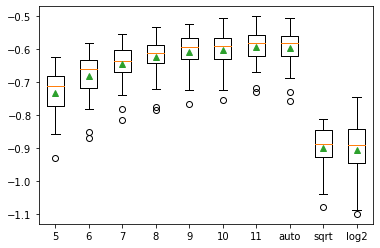

Wall time: 2min 15s


In [60]:
%%time

# run function to evaluate the max_features hyperparameter
plot_param_tuning_regression(x_train_rbwrte, y_train_rbwrte, tune_max_features_regression())

In [ ]:
%%time

# run function to evaluate the max_features hyperparameter
plot_param_tuning_regression(x_train_qb, y_train_qb, tune_max_features_regression())

In [ ]:
%%time

# run function to evaluate the max_features hyperparameter
plot_param_tuning_regression(x_train_def, y_train_def, tune_max_features_regression())

In [ ]:
%%time

# run function to evaluate the max_features hyperparameter
plot_param_tuning_regression(x_train_kr, y_train_kr, tune_max_features_regression())

## Create Function to Tune the n_estimators Hyperparameter

The number of trees in the forest is another key hyperparameter to configure for the random forest.

Typically, the number of trees is increased until the model performance stabilizes. Intuition might suggest that more trees will lead to overfitting, although this is not the case. Both bagging and random forest algorithms appear to be somewhat immune to overfitting the training dataset given the stochastic nature of the learning algorithm.

n_estimators: int, default=100

Sources: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;https://machinelearningmastery.com/random-forest-ensemble-in-python/

#### Please set user defined fields below

Note that more trees lead to longer model run times.

In [61]:
# define the number of trees below
num_trees = [10, 50, 100]#, 500, 1000]

In [62]:
# function to generate a dictionary of regression models to evaluate
def tune_n_estimators_regression():
    '''
    Function to generate regression models to tune the n_estimators hyperparameter
    
    returns: dictionary of regression models
    '''
    
    models = dict()
    
    # define number of trees to consider
    n_trees = num_trees
    
    # explore different n_estimators options
    for n in n_trees:
        models[str(n)] = RandomForestRegressor(n_estimators=n)
    return models

>10 MAE: -0.670 (0.053)
>50 MAE: -0.603 (0.054)
>100 MAE: -0.597 (0.056)


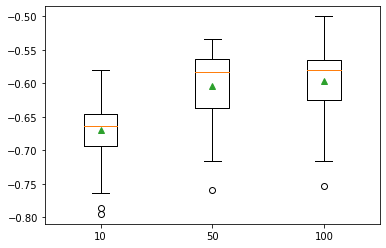

Wall time: 35.3 s


In [63]:
%%time

# run function to evaluate the n_estimators hyperparameter
plot_param_tuning_regression(x_train_rbwrte, y_train_rbwrte, tune_n_estimators_regression())

In [ ]:
%%time

# run function to evaluate the n_estimators hyperparameter
plot_param_tuning_regression(x_train_qb, y_train_qb, tune_n_estimators_regression())

In [ ]:
%%time

# run function to evaluate the n_estimators hyperparameter
plot_param_tuning_regression(x_train_def, y_train_def, tune_n_estimators_regression())

In [ ]:
%%time

# run function to evaluate the n_estimators hyperparameter
plot_param_tuning_regression(x_train_kr, y_train_kr, tune_n_estimators_regression())

## Create Function to Tune the max_depth Hyperparameter

A final interesting hyperparameter is the maximum depth of decision trees used in the ensemble.

By default, trees are constructed to an arbitrary depth and are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. This is a sensible default, although we can also explore fitting trees with different fixed depths.

max_depth: int, default=None

Sources: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;https://machinelearningmastery.com/random-forest-ensemble-in-python/

#### Please set user defined fields below

Note that more tree depth may make it difficult to show our business partners how the model made its predictions.

In [64]:
# set user defined fields to determine tree depth
# note that the upper bound won't be included in the range
lower_bound = 3
upper_bound = 8

tree_depth = [i for i in range(lower_bound,upper_bound)]

In [65]:
# function to generate a dictionary of regression models to evaluate
def tune_max_depth_regression():
    '''
    Function to generate regression models to tune the max_depth hyperparameter
    
    returns: dictionary of regression models
    '''
    
    models = dict()
    
    # define tree depth
    depths = tree_depth + [None]
    
    # explore different n_estimators options
    for n in depths:
        models[str(n)] = RandomForestRegressor(max_depth=n)
    return models

>3 MAE: -3.083 (0.134)
>4 MAE: -2.533 (0.102)
>5 MAE: -1.803 (0.100)
>6 MAE: -1.334 (0.079)
>7 MAE: -1.039 (0.068)
>None MAE: -0.598 (0.054)


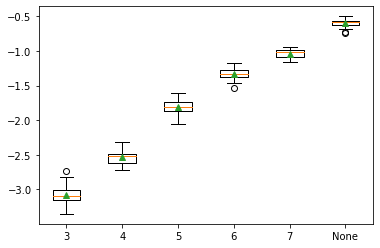

Wall time: 1min 11s


In [66]:
%%time

# run function to evaluate the max_depth hyperparameter
plot_param_tuning_regression(x_train_rbwrte, y_train_rbwrte, tune_max_depth_regression())

In [ ]:
%%time

# run function to evaluate the max_depth hyperparameter
plot_param_tuning_regression(x_train_qb, y_train_qb, tune_max_depth_regression())

In [ ]:
%%time

# run function to evaluate the max_depth hyperparameter
plot_param_tuning_regression(x_train_def, y_train_def, tune_max_depth_regression())

In [ ]:
%%time

# run function to evaluate the max_depth hyperparameter
plot_param_tuning_regression(x_train_kr, y_train_kr, tune_max_depth_regression())

## Grid Search to Collectively Tune Hyperparameters

Exhaustive search over specified parameter values for an estimator.  The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.  In this case, 10-fold cross validation.

Since a grid search is computationally expensive especially with larger datasets, please use the top 2 options in each hyperparameter defined above.

Note that criterion only has 2 options, 'mse' and 'mae' which is the function to measure the quality of a split. Supported criteria are “mse” for the mean squared error, which is equal to variance reduction as feature selection criterion, and “mae” for the mean absolute error.  

criterion: {“mse”, “mae”}, default=”mse”

Sources: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

### Create Lists of Hyperparameters for each Position Group

In [ ]:
# create lists of optimal hyperparameter values for rbwrte
n_estimators_rbwrte = [50, 100]
criterion_rbwrte    = ['mse', 'mae']
max_samples_rbwrte  = [0.7, 0.8]
max_features_rbwrte = [9, 'auto']
max_depth_rbwrte    = [8, None]

In [ ]:
# create lists of optimal hyperparameter values for qb
n_estimators_qb = [50, 100]
criterion_qb    = ['mse', 'mae']
max_samples_qb  = [0.7, 0.8]
max_features_qb = [9, 'auto']
max_depth_qb   = [8, None]

In [ ]:
# create lists of optimal hyperparameter values for def
n_estimators_def = [50, 100]
criterion_def    = ['mse', 'mae']
max_samples_def  = [0.7, 0.8]
max_features_def = [9, 'auto']
max_depth_def    = [8, None]

In [ ]:
# create lists of optimal hyperparameter values for kr
n_estimators_kr = [50, 100]
criterion_kr    = ['mse', 'mae']
max_samples_kr  = [0.7, 0.8]
max_features_kr = [9, 'auto']
max_depth_kr    = [8, None]

### Perform Grid Search

In [67]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion

# function to perform grid search using a regression models
def rf_pipeline(X, y, n_estimators, criterion, max_samples, max_features, max_depth):
    '''
    Function to perform a grid search using a regression models
    
    param X: pandas dataframe containing feature matrix
    param y: target variable
    param n_estimators: list of optimal n_estimators values
    param criterion: list of optimal criterion values
    param max_samples: list of optimal max_samples values
    param max_features: list of optimal max_features values
    param max_depth: list of optimal max_depth values
    
    returns: pandas dataframe of the cross validation results sorted by rank_test_score
             best_params_ which are the best hyperparameters
    '''
    
    # define pipeline
    pipe = Pipeline([('classifier', RandomForestRegressor())])
    
    # define hyperparameters to serach
    param_grid = {'classifier__n_estimators': n_estimators,
                  'classifier__criterion'   : criterion,
                  'classifier__max_samples' : max_samples,
                  'classifier__max_features': max_features,
                  'classifier__max_depth'   : max_depth
                 }
    
    # define grid search
    grid = GridSearchCV(pipe, 
                        cv=10, 
                        n_jobs=1, 
                        param_grid=param_grid
                       )
    
    # fit the grid search
    grid.fit(X,y)
    
    return pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score'), grid.best_params_

In [68]:
%%time

# run function to perform grid search using regression models
grid_cv_results, grid_best_params = rf_pipeline(x_train_rbwrte
                                               ,y_train_rbwrte
                                               ,n_estimators_rbwrte
                                               ,criterion_rbwrte
                                               ,max_samples_rbwrte
                                               ,max_features_rbwrte
                                               ,max_depth_rbwrte
                                               )

Wall time: 34min 41s


In [69]:
# print top 5 results
grid_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__criterion,param_classifier__max_depth,param_classifier__max_features,param_classifier__max_samples,param_classifier__n_estimators,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
15,1.477325,0.081419,0.015629,0.000003,mse,None,auto,0.8,100,"{'classifier__criterion': 'mse', 'classifier__...",...,0.982410,0.982853,0.967651,0.977867,0.980947,0.962646,0.979327,0.976594,0.006412,1
11,0.991137,0.016925,0.009376,0.007656,mse,None,9,0.8,100,"{'classifier__criterion': 'mse', 'classifier__...",...,0.984510,0.983879,0.969706,0.976763,0.978957,0.964803,0.977403,0.976552,0.005858,2
14,0.740704,0.050492,0.004689,0.007162,mse,None,auto,0.8,50,"{'classifier__criterion': 'mse', 'classifier__...",...,0.982680,0.981902,0.968003,0.977558,0.979146,0.963623,0.978353,0.976112,0.005786,3
13,1.341942,0.039347,0.015627,0.006988,mse,None,auto,0.7,100,"{'classifier__criterion': 'mse', 'classifier__...",...,0.983786,0.983295,0.968011,0.975279,0.981021,0.962840,0.976138,0.976085,0.006537,4
10,0.530973,0.067039,0.007814,0.007814,mse,None,9,0.8,50,"{'classifier__criterion': 'mse', 'classifier__...",...,0.983734,0.982982,0.968560,0.977234,0.979416,0.962022,0.976196,0.975887,0.006436,5


In [70]:
# print best hyperparameters options
grid_best_params

{'classifier__criterion': 'mse',
 'classifier__max_depth': None,
 'classifier__max_features': 'auto',
 'classifier__max_samples': 0.8,
 'classifier__n_estimators': 100}

In [ ]:
%%time

# run function to perform grid search using regression models
grid_cv_results, grid_best_params = rf_pipeline(x_train_qb
                                               ,y_train_qb
                                               ,n_estimators_qb
                                               ,criterion_qb
                                               ,max_samples_qb
                                               ,max_features_qb
                                               ,max_depth_qb
                                               )

In [ ]:
# print top 5 results
grid_cv_results.head()

In [ ]:
# print best hyperparameters options
grid_best_params

In [ ]:
%%time

# run function to perform grid search using regression models
grid_cv_results, grid_best_params = rf_pipeline(x_train_def
                                               ,y_train_def
                                               ,n_estimators_def
                                               ,criterion_def
                                               ,max_samples_def
                                               ,max_features_def
                                               ,max_depth_def
                                               )

In [ ]:
# print top 5 results
grid_cv_results.head()

In [ ]:
# print best hyperparameters options
grid_best_params

In [ ]:
%%time

# run function to perform grid search using regression models
grid_cv_results, grid_best_params = rf_pipeline(x_train_kr
                                               ,y_train_kr
                                               ,n_estimators_kr
                                               ,criterion_kr
                                               ,max_samples_kr
                                               ,max_features_kr
                                               ,max_depth_kr
                                               )

In [ ]:
# print top 5 results
grid_cv_results.head()

In [ ]:
# print best hyperparameters options
grid_best_params

## Create Train and Validation Data for Final Model

In [4]:
from sklearn.model_selection import train_test_split

# split rbwrte data into training and testing subsets with 20% reserved for the testing subset
X_train_rbwrte, X_valid_rbwrte, y_train_rbwrte, y_valid_rbwrte = train_test_split(x_train_rbwrte, y_train_rbwrte
                                                                                 ,test_size = 0.20
                                                                                 ,random_state = 42
                                                                                 )

In [ ]:
# split qb data into training and testing subsets with 20% reserved for the testing subset
X_train_qb, X_valid_qb, y_train_qb, y_valid_qb = train_test_split(x_train_qb, y_train_qb
                                                                 ,test_size = 0.20
                                                                 ,random_state = 42
                                                                 )

In [ ]:
# split def data into training and testing subsets with 20% reserved for the testing subset
X_train_def, X_valid_def, y_train_def, y_valid_def = train_test_split(x_train_def, y_train_def
                                                                     ,test_size = 0.20
                                                                     ,random_state = 42
                                                                     )

In [ ]:
# split kicker data into training and testing subsets with 20% reserved for the testing subset
X_train_kr, X_valid_kr, y_train_kr, y_valid_kr = train_test_split(x_train_kr, y_train_kr
                                                                 ,test_size = 0.20
                                                                 ,random_state = 42
                                                                 )

## Create Final Models

In [5]:
# function to perform grid search using a regression models
def create_final_model(X_train, y_train, X_valid, grid_best_params):
    '''
    Function to perform a grid search using a regression models
    
    param X_train: pandas dataframe containing feature matrix
    param y_train: target variable using train data
    param X_valid: ltarget variable using validation data
    param grid_best_params: dictionary of the grid search's best hyperparameter values
    
    returns: random forest model
             predictions
    '''
    
    # create final random forest regression model using the hyperparameter options saved in grid_best_params
    rf_model = RandomForestRegressor(criterion    = grid_best_params['classifier__criterion']
                                    ,max_depth    = grid_best_params['classifier__max_depth']
                                    ,max_features = grid_best_params['classifier__max_features']
                                    ,max_samples  = grid_best_params['classifier__max_samples']
                                    ,n_estimators = grid_best_params['classifier__n_estimators']
                                    )

    # fit model with training data
    rf_model.fit(X_train, y_train)

    # generate predictions
    y_pred = rf_model.predict(X_valid)
    
    return rf_model, y_pred

In [6]:
grid_best_params_rbwrte = {'classifier__criterion': 'mse',
                           'classifier__max_depth': None,
                           'classifier__max_features': 'auto',
                           'classifier__max_samples': 0.8,
                           'classifier__n_estimators': 100}

In [8]:
%%time
from sklearn.ensemble import RandomForestRegressor
# create final random forest regression model and make predictions
rf_model_rbwrte, y_pred_rbwrte = create_final_model(X_train_rbwrte
                                                   ,y_train_rbwrte
                                                   ,X_valid_rbwrte
                                                   ,grid_best_params_rbwrte
                                                   )

Wall time: 2.72 s


In [ ]:
%%time

# create final random forest regression model and make predictions
rf_model_qb, y_pred_qb = create_final_model(X_train_qb
                                           ,y_train_qb
                                           ,X_valid_qb
                                           ,grid_best_params_qb
                                           )

In [ ]:
%%time

# create final random forest regression model and make predictions
rf_model_def, y_pred_def = create_final_model(X_train_def
                                             ,y_train_def
                                             ,X_valid_def
                                             ,grid_best_params_def
                                             )

In [ ]:
%%time

# create final random forest regression model and make predictions
rf_model_def, y_pred_def = create_final_model(X_train_kr
                                             ,y_train_kr
                                             ,X_valid_kr
                                             ,grid_best_params_kr
                                             )

## Evaluate Feature Importances

In order to quantify the usefulness of all the variables in the entire random forest, we can look at the relative importances of the variables. The importances returned in Skicit-learn represent how much including a particular variable improves the prediction. 

In future implementations of the model, we can remove those variables that have no importance and the performance will not suffer. Additionally, if we are using a different model, say a support vector machine, we could use the random forest feature importances as a kind of feature selection method.

Source: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

#### Please set user defined fields below

Since we're using toy data with 20 features, the feature list is simply the numbers between 1 and 20.

When using real data feature_list can be set to or replaced with data.columns (excluding the target variable).

In [9]:
# create list of features
feature_list = X_train_rbwrte.columns

# get numerical feature importances
importances = list(rf_model_rbwrte.feature_importances_)

# list of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# print out the feature and importances 
[print('Feature: {:3} Importance: {}'.format(*pair)) for pair in feature_importances];

Feature: rec_yrd Importance: 0.43
Feature: rush_yrd Importance: 0.24
Feature: rec_td Importance: 0.15
Feature: rush_td Importance: 0.11
Feature: receptions Importance: 0.03
Feature: total_off_share Importance: 0.01
Feature: yrd_per_catch Importance: 0.01
Feature: yards_after_catch Importance: 0.01
Feature: wopr Importance: 0.01
Feature: rush_2pt_con Importance: 0.0
Feature: rec_2pt_con Importance: 0.0
Feature: fum_lost Importance: 0.0
Feature: yrd_per_rush Importance: 0.0
Feature: racr Importance: 0.0
Feature: adot Importance: 0.0


In [ ]:
# create list of features
feature_list = X_train_qb.columns

# get numerical feature importances
importances = list(rf_model_qb.feature_importances_)

# list of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# print out the feature and importances 
[print('Feature: {:3} Importance: {}'.format(*pair)) for pair in feature_importances];

In [ ]:
# create list of features
feature_list = X_train_def.columns

# get numerical feature importances
importances = list(rf_model_def.feature_importances_)

# list of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# print out the feature and importances 
[print('Feature: {:3} Importance: {}'.format(*pair)) for pair in feature_importances];

In [ ]:
# create list of features
feature_list = X_train_kr.columns

# get numerical feature importances
importances = list(rf_model_kr.feature_importances_)

# list of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# print out the feature and importances 
[print('Feature: {:3} Importance: {}'.format(*pair)) for pair in feature_importances];

## Evaluate Final Model

Depending on the data and the problem we're trying to solve, we may need to evaluate our model using one or more of the metrics below.  Please remember that these metrics may not be appropriate for all scenarios and we may need to use an evaluation method not listed here.  These are simply the most common metrics.

**RMSE (root mean squared error)** is defined as the square root of the average squared distance between the actual score and the predicted score.  Smaller scores are better, however, we should note first and foremost that “small” will depend on our choice of units, and on the specific application we are hoping for.

In RMSE, the errors are squared before they are averaged. This basically implies that RMSE assigns a higher weight to larger errors. This indicates that RMSE is much more useful when large errors are present and they drastically affect the model's performance. It avoids taking the absolute value of the error and this trait is useful in many mathematical calculations. In this metric the lower the value the better the performance of the model.

In data science, RMSE has a double purpose:
- To serve as a heuristic for training models
- To evaluate trained models for usefulness / accuracy

**MSE (mean squared error)** is calculated by taking the average of the square of the difference between the original and predicted values of the data.

It is one of the most commonly used metrics, but least useful when a single bad prediction would ruin the entire model's predicting abilities, i.e when the dataset contains a lot of noise. It is most useful when the dataset contains outliers, or unexpected values (too high or too low values).

**MAE (mean absolute error)** is the absolute difference between the actual or true values and the values that are predicted.

It is not very sensitive to outliers in comparison to MSE since it doesn't punish huge errors. It is usually used when the performance is measured on continuous variable data. It gives a linear value, which averages the weighted individual differences equally. The lower the value the better the model's performance but remember "lower" will depend on our choice of units, and on the specific application we are hoping for.

**R² (coefficient of determination) regression score function** indicates how close the regression line (i.e the predicted values) is to the actual data values. The R squared value lies between 0 and 1 where 0 indicates that this model doesn't fit the given data and 1 indicates that the model fits perfectly to the dataset provided.

A caution of note as when we add more independent variables, R² gets a higher value. The R² value keeps on increasing with addition of more independent variables even though they may not really have a significant impact on the predictions. This does not help us to build a good model.
To overcome this issue, we use Adjusted R². Adjusted R² penalizes the model for every addition of an insignificant independent variable.

Sources: https://towardsdatascience.com/what-does-rmse-really-mean-806b65f2e48e
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;https://vijay-choubey.medium.com/how-to-evaluate-the-performance-of-a-machine-learning-model-d12ce920c365
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;https://www.studytonight.com/post/what-is-mean-squared-error-mean-absolute-error-root-mean-squared-error-and-r-squared

In [10]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("rbwrte")

# calculate root mean squared error
mse = mean_squared_error(y_valid_rbwrte, y_pred_rbwrte)
rmse = np.sqrt(mse)
print('RMSE: %.3f' % (rmse))
print('MSE: %.3f' % (mse))

# calculate root mean absolute error
mae = mean_absolute_error(y_valid_rbwrte, y_pred_rbwrte)
print('MAE: %.3f' % (mae))

# calculate r2 score
r2 = r2_score(y_valid_rbwrte, y_pred_rbwrte)
print('R2: %.3f' % (r2))

rbwrte
RMSE: 1.946
MSE: 3.786
MAE: 1.240
R2: 0.956


In [ ]:
print("qb")

# calculate root mean squared error
mse = mean_squared_error(y_valid_qb, y_pred_qb)
rmse = np.sqrt(mse)
print('RMSE: %.3f' % (rmse))
print('MSE: %.3f' % (mse))

# calculate root mean absolute error
mae = mean_absolute_error(y_valid_qb, y_pred_qb)
print('MAE: %.3f' % (mae))

# calculate r2 score
r2 = r2_score(y_valid_qb, y_pred_qb)
print('R2: %.3f' % (r2))

In [ ]:
print("def")

# calculate root mean squared error
mse = mean_squared_error(y_valid_def, y_pred_def)
rmse = np.sqrt(mse)
print('RMSE: %.3f' % (rmse))
print('MSE: %.3f' % (mse))

# calculate root mean absolute error
mae = mean_absolute_error(y_valid_def, y_pred_def)
print('MAE: %.3f' % (mae))

# calculate r2 score
r2 = r2_score(y_valid_def, y_pred_def)
print('R2: %.3f' % (r2))

In [ ]:
print("kr")

# calculate root mean squared error
mse = mean_squared_error(y_valid_kr, y_pred_kr)
rmse = np.sqrt(mse)
print('RMSE: %.3f' % (rmse))
print('MSE: %.3f' % (mse))

# calculate root mean absolute error
mae = mean_absolute_error(y_valid_kr, y_pred_kr)
print('MAE: %.3f' % (mae))

# calculate r2 score
r2 = r2_score(y_valid_kr, y_pred_kr)
print('R2: %.3f' % (r2))

## Plot Final Model's Predictions vs Test Data

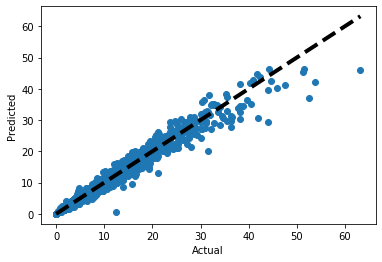

In [11]:
import matplotlib.pyplot as plt

# source: https://scikit-learn.org/0.18/auto_examples/plot_cv_predict.html
fig, ax = plt.subplots()
ax.scatter(y_valid_rbwrte, y_pred_rbwrte)
ax.plot([y_pred_rbwrte.min(), y_valid_rbwrte.max()], [y_pred_rbwrte.min(), y_valid_rbwrte.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_valid_qb, y_pred_qb)
ax.plot([y_pred_qb.min(), y_valid_qb.max()], [y_pred_qb.min(), y_valid_qb.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_valid_def, y_pred_def)
ax.plot([y_pred_def.min(), y_valid_def.max()], [y_pred_def.min(), y_valid_def.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_valid_kr, y_pred_kr)
ax.plot([y_pred_kr.min(), y_valid_kr.max()], [y_pred_kr.min(), y_valid_kr.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

## Create Test Data - Under Construction

For data input to predict the 2020 NFL Fantasy Football season, I'll use a player's average statistics to generate predictions for week 1 through 4.  Starting at week 5, I'll use a 4 week rolling average on player statistics as data input.

In [95]:
# set week number

week = 1

In [86]:
# function to create test data
def create_test_data(data, columns):
        '''
        Function to evaluate and plot hyperparameter tuning result using RepeatedKFold 10-fold cross validation
    
        param data: pandas dataframe
        param columns: list of feature matrix variables
        
        return pandas dataframe with player and position data
               pandas dataframe with model input features
        '''
        df = data.loc[(data['year']==data['year'].max()-1)].groupby(['player'
                                                                    ,'short_name'
                                                                    ,'position_name'
                                                                    ],as_index=False)[columns[:-1]].mean().sample(frac = 1)
        df_fx = df[columns[:-1]]
        
        return df, df_fx        

In [87]:
rbwrte_avg, X_test_rbwrte = create_test_data(rbwrte_df, rbwrte_fx)

In [88]:
qb_avg, X_test_qb = create_test_data(qb_df, qb_fx)

In [89]:
def_avg, X_test_def = create_test_data(def_df, def_fx)

In [90]:
kr_avg, X_test_kr = create_test_data(kr_df, kr_fx)

## Make Predictions on Test Data

In [99]:
# make predictions for rbwrte
y_pred_rbwrte = rf_model_rbwrte.predict(X_test_rbwrte)

# add predictions to averages dataframe
rbwrte_avg['pred'] = y_pred_rbwrte
rbwrte_avg['year'] = rbwrte_df['year'].max()
rbwrte_avg['week'] = week

rbwrte_avg.head()

,player,short_name,position_name,rush_yrd,rush_td,rush_2pt_con,receptions,rec_yrd,rec_td,rec_2pt_con,...,yrd_per_rush,total_off_share,yrd_per_catch,yards_after_catch,racr,adot,wopr,pred,year,week
139,Marlon Mack,M.Mack,RB,77.928571,0.571429,0.071429,1.000000,5.857143,0.000000,0.0,...,4.289190,0.194956,3.380952,5.714286,0.180952,-0.392857,0.060898,16.450,2020,1
50,Darren Fells,D.Fells,TE,0.000000,0.000000,0.000000,1.666667,13.166667,0.333333,0.0,...,0.000000,0.000000,8.083333,6.166667,1.044846,5.361111,0.172276,2.116,2020,1
197,Tyreek Hill,T.Hill,WR,2.090909,0.000000,0.000000,5.272727,78.181818,0.636364,0.0,...,1.727273,0.072473,14.847521,25.454545,0.905241,11.942593,0.603928,18.772,2020,1
99,Jamison Crowder,J.Crowder,WR,0.250000,0.000000,0.000000,4.875000,52.062500,0.375000,0.0,...,0.250000,0.014881,10.506027,22.062500,1.058369,8.160974,0.543108,10.044,2020,1
151,Mike Williams,M.Williams,WR,0.133333,0.000000,0.000000,3.266667,66.733333,0.133333,0.0,...,0.133333,0.004167,21.986667,12.466667,0.758155,18.114660,0.488857,9.756,2020,1


In [ ]:
# make predictions for rbwrte
y_pred_rbwrte = rf_model_rbwrte.predict(X_test_rbwrte)

# add predictions to averages dataframe
rbwrte_avg['pred'] = y_pred_rbwrte
rbwrte_avg['year'] = rbwrte_df['year'].max()
rbwrte_avg['week'] = week

In [ ]:
# make predictions for rbwrte
y_pred_rbwrte = rf_model_rbwrte.predict(X_test_rbwrte)

# add predictions to averages dataframe
rbwrte_avg['pred'] = y_pred_rbwrte
rbwrte_avg['year'] = rbwrte_df['year'].max()
rbwrte_avg['week'] = week

In [ ]:
# make predictions for rbwrte
y_pred_rbwrte = rf_model_rbwrte.predict(X_test_rbwrte)

# add predictions to averages dataframe
rbwrte_avg['pred'] = y_pred_rbwrte
rbwrte_avg['year'] = rbwrte_df['year'].max()
rbwrte_avg['week'] = week

## Add Predictions to Original Dataframes

In [94]:
rbwrte_df[(rbwrte_df['year'] == rbwrte_df['year'].max()) & (rbwrte_df['week'] == 1)].head()

,year,week,player,short_name,position_name,pro_team,pro_team_abv,rush_yrd,rush_td,rush_2pt_con,...,rec_2pt_con,fum_lost,yrd_per_rush,total_off_share,yrd_per_catch,yards_after_catch,racr,adot,wopr,actual_points
5004,2020,1,Saquon Barkley,S.Barkley,RB,New York Giants,NYG,6.0,0.0,0.0,...,0.0,0.0,0.400000,0.35000,10.000000,55.0,1.764706,3.777778,0.435442,13.8
5005,2020,1,Chris Godwin,C.Godwin,WR,Tampa Bay Buccaneers,TB,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,13.166667,26.0,1.128571,10.000000,0.467808,15.0
5006,2020,1,Joe Mixon,J.Mixon,RB,Cincinnati Bengals,CIN,69.0,0.0,0.0,...,0.0,1.0,3.631579,0.31746,2.000000,8.0,-0.222222,-4.500000,0.064065,6.8
5007,2020,1,A.J. Brown,A.Brown,WR,Tennessee Titans,TEN,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,7.800000,14.0,0.764706,6.375000,0.456579,9.2
5008,2020,1,Mark Andrews,M.Andrews,TE,Baltimore Ravens,BAL,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,11.600000,4.0,0.920635,10.500000,0.532941,23.6


In [100]:
# function to add predcitions to rosters data
def create_curr_year_week_df(data, week):
        '''
        Function to create a dataframe of the current week's fantasy football rosters and add my predictions to them
    
        param data: pandas dataframe
        param week: current week number (user defined variable)
        
        return pandas dataframe with my predictions
        '''
        
        # read in rosters data
        df = pd.read_csv("rosters_df.csv")
        
        # filter by year, week
        df = df[(df['year'] == data['year'].max()) & (df['week'] == week)]
        
        columns = df.columns + 'pred'
        
        # merge predictions to rosters data
        df = df.merge(data, on = ['year', 'week', 'player'], how = 'left')
        
        # select relavent columns
        df = df[columns]
        
        return df

In [101]:
rbwrte_preds = create_curr_year_week_df(rbwrte_avg, week)
rbwrte_preds.head()

KeyError: "None of [Index(['yearpred', 'weekpred', 'owner_teampred', 'ownerpred', 'playerpred',\n       'pro_teampred', 'pro_team_abvpred', 'current_inj_statuspred',\n       'lineup_slot_namepred', 'position_namepred', 'proj_pointspred',\n       'actual_pointspred', 'slot_idpred'],\n      dtype='object')] are in the [columns]"

In [93]:
ls = [1, 2, 3, 4]

for i in range(1, 8):
    if i in (1, 2, 3, 4):
        print(i)

1
2
3
4


In [2]:
test = rbwrte_df.loc[(rbwrte_df['year'] == 2020)]
test.head()

,year,week,player,short_name,position_name,pro_team,pro_team_abv,rush_yrd,rush_td,rush_2pt_con,...,rec_2pt_con,fum_lost,yrd_per_rush,total_off_share,yrd_per_catch,yards_after_catch,racr,adot,wopr,actual_points
5004,2020,1,Saquon Barkley,S.Barkley,RB,New York Giants,NYG,6.0,0.0,0.0,...,0.0,0.0,0.400000,0.35000,10.000000,55.0,1.764706,3.777778,0.435442,13.8
5005,2020,1,Chris Godwin,C.Godwin,WR,Tampa Bay Buccaneers,TB,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,13.166667,26.0,1.128571,10.000000,0.467808,15.0
5006,2020,1,Joe Mixon,J.Mixon,RB,Cincinnati Bengals,CIN,69.0,0.0,0.0,...,0.0,1.0,3.631579,0.31746,2.000000,8.0,-0.222222,-4.500000,0.064065,6.8
5007,2020,1,A.J. Brown,A.Brown,WR,Tennessee Titans,TEN,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,7.800000,14.0,0.764706,6.375000,0.456579,9.2
5008,2020,1,Mark Andrews,M.Andrews,TE,Baltimore Ravens,BAL,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,11.600000,4.0,0.920635,10.500000,0.532941,23.6


In [3]:
test.tail()

,year,week,player,short_name,position_name,pro_team,pro_team_abv,rush_yrd,rush_td,rush_2pt_con,...,rec_2pt_con,fum_lost,yrd_per_rush,total_off_share,yrd_per_catch,yards_after_catch,racr,adot,wopr,actual_points
7608,2020,17,Jerick McKinnon,J.McKinnon,RB,San Francisco 49ers,SF,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,6.000000,1.0,1.200000,5.000000,0.056216,1.6
7610,2020,17,Melvin Gordon III,M.Gordon,RB,Denver Broncs,DEN,93.0,1.0,0.0,...,0.0,0.0,3.576923,0.410959,4.250000,33.0,-1.000000,-2.833333,0.177904,22.6
7611,2020,17,Salvon Ahmed,S.Ahmed,RB,Miami Dolphins,MIA,29.0,1.0,0.0,...,0.0,0.0,4.833333,0.112500,6.333333,30.0,-1.727273,-3.666667,0.057500,13.8
7612,2020,17,Gus Edwards,G.Edwards,RB,Baltimore Ravens,BAL,60.0,0.0,0.0,...,0.0,0.0,5.000000,0.178082,10.000000,10.0,0.000000,0.000000,0.078947,9.4
7613,2020,17,David Johnson,D.Johnson,RB,Houston Texans,HOU,84.0,1.0,0.0,...,0.0,0.0,6.000000,0.293103,12.000000,28.0,3.600000,2.000000,0.199754,22.8


In [5]:
test2 = test[rbwrte_fx].ewm(span = 4).mean()
test2.head()

,rush_yrd,rush_td,rush_2pt_con,receptions,rec_yrd,rec_td,rec_2pt_con,fum_lost,yrd_per_rush,total_off_share,yrd_per_catch,yards_after_catch,racr,adot,wopr,actual_points
5004,6.000000,0.0,0.0,6.000000,60.000000,0.000000,0.0,0.000000,0.400000,0.350000,10.000000,55.000000,1.764706,3.777778,0.435442,13.800000
5005,2.250000,0.0,0.0,6.000000,71.875000,0.000000,0.0,0.000000,0.150000,0.131250,11.979167,36.875000,1.367122,7.666667,0.455671,14.550000
5006,36.306122,0.0,0.0,3.448980,36.224490,0.000000,0.0,0.510204,1.926316,0.226255,6.887755,22.142857,0.556232,1.459184,0.255872,10.595918
5007,19.621324,0.0,0.0,4.161765,37.500000,0.000000,0.0,0.275735,1.041060,0.122278,7.306985,18.400735,0.652038,3.718290,0.348109,9.954412
5008,11.111034,0.0,0.0,4.525330,46.391395,0.867453,0.0,0.156142,0.589525,0.069243,9.168980,12.154754,0.768536,6.659698,0.428275,15.872866


In [ ]:
def predict_2020_season(data, columns, week, model):
    '''
    function to do something
    
    1. loop through each week
    
    2. compute Exponential Moving average
    
    3. predict ff pts
    '''
    
    if week == 1:
        df_prev = data.loc[(data['year']==data['year'].max()-1)].groupby(['player'
                                                                         ,'short_name'
                                                                         ,'position_name'
                                                                         ],as_index=False)[columns[:-1]].mean()
        X_test = df_prev[columns[:-1]]
        
        y_pred = model.predict(X_test)  
        
        df_prev['pred'] = y_pred
        df_prev['year'] = data['year'].max()
        df_prev['week'] = week  

        # read in rosters data
        df_curr = pd.read_csv("rosters_df.csv")
        
        # filter by year, week
        df_curr = df_curr[(df_curr['year'] == df_curr['year'].max()) & (df_curr['week'] == week)]
        
        columns = list(df_curr.columns) + ['pred']
        
        # merge predictions to rosters data
        df_curr = df_curr.merge(df_prev, on = ['year', 'week', 'player', 'position_name'], how = 'left')
        
        # select relavent columns
        df_curr = df_curr[columns]
        
    else:
        df_prev = data.loc[(data['year'] == data['year'].max()) & (data['week'] < week)]
        
        df_prev_ewm = df_prev.groupby(['player'
                                      ,'short_name'
                                      ,'position_name']).apply(lambda x: x[columns[:-1]].ewm(span=4).mean())
        
        df_prev = df_prev[['year'
                          ,'week'
                          ,'player'
                          ,'short_name'
                          ,'position_name'
                          ,'pro_team'
                          ,'pro_team_abv']]
        
        df_prev = pd.concat([df_prev, df_prev_ewm], axis = 1)
        
        df_prev = df_prev.loc[(df_prev['week'] == week - 1)]
        
        X_test = df_prev[columns[:-1]]
        
        y_pred = model.predict(X_test)  
        
        
        
        
        
    
    
    

In [32]:
rbwrte_df.head(2)

,year,week,player,short_name,position_name,pro_team,pro_team_abv,rush_yrd,rush_td,rush_2pt_con,...,rec_2pt_con,fum_lost,yrd_per_rush,total_off_share,yrd_per_catch,yards_after_catch,racr,adot,wopr,actual_points
0,2018,1,David Johnson,D.Johnson,RB,Arizona Cardinals,ARI,37.0,1.0,0.0,...,0.0,0.0,4.111111,0.28,6.000000,20.0,4.285714,0.777778,0.409272,15.8
1,2018,1,Melvin Gordon,M.Gordon,RB,Los Angeles Chargers,LAC,64.0,0.0,1.0,...,0.0,0.0,4.000000,0.32,11.333333,119.0,-6.375000,-1.230769,0.351812,27.8


In [80]:
week = 9

df_prev = rbwrte_df.loc[(rbwrte_df['year']==rbwrte_df['year'].max()) & (rbwrte_df['week']<week)]

#df_prev = df_prev.groupby(['player', 'short_name', 'position_name'],as_index=False)[rbwrte_fx[:-1]].mean()

df_prev_ewm = df_prev.groupby(['player', 'short_name', 'position_name']).apply(lambda x: x[rbwrte_fx[:-1]].ewm(span=4).mean())

df_prev = df_prev[player_columns]

df_prev = pd.concat([df_prev, df_prev_ewm], axis = 1)

df_prev = df_prev.loc[(df_prev['week'] == week - 1)]

#df_prev[[c+"_ewm" for c in rbwrte_fx[:-1]]] = df_prev.groupby(['player', 'short_name', 'position_name']).apply(lambda x: x[rbwrte_fx[:-1]].ewm(span=4).mean())

df_prev.tail()

,year,week,player,short_name,position_name,pro_team,pro_team_abv,rush_yrd,rush_td,rush_2pt_con,receptions,rec_yrd,rec_td,rec_2pt_con,fum_lost,yrd_per_rush,total_off_share,yrd_per_catch,yards_after_catch,racr,adot,wopr
6235,2020,8,Jerick McKinnon,J.McKinnon,RB,San Francisco 49ers,SF,7.769554,0.510175,0.0,2.594156,21.906063,0.011389,0.0,0.000000,1.089934,0.094824,5.831392,13.650741,1.548176,2.747564,0.165817
6236,2020,8,Mike Davis,M.Davis,RB,Carolina Panthers,CAR,52.701799,0.205424,0.0,3.328947,19.484425,0.123255,0.0,0.151047,3.903122,0.317503,7.131629,24.917293,-2.980023,-2.336131,0.189181
6237,2020,8,Robert Tonyan,R.Tonyan,TE,Greenbay Packers,GB,0.000000,0.000000,0.0,3.714286,54.693878,0.000000,0.0,0.000000,0.000000,0.000000,14.489796,18.081633,1.186209,9.784985,0.307889
6238,2020,8,Travis Fulgham,T.Fulgham,WR,Philadelphia Eagles,PHI,0.000000,0.000000,0.0,5.693878,75.918367,0.693878,0.0,0.000000,0.000000,0.000000,13.397959,18.938776,0.884452,10.586138,0.584816
6239,2020,8,Melvin Gordon III,M.Gordon,RB,Denver Broncs,DEN,52.897288,0.586466,0.0,3.892186,15.603383,0.054377,0.0,0.536117,3.737836,0.287691,4.549275,12.535311,3.599857,1.017296,0.222144


In [66]:
df_prev.loc[(df_prev['year']==df_prev['year'].max()) & (df_prev['week']<5)& (df_prev['player']=='Mark Andrews')]

,year,week,player,short_name,position_name,pro_team,pro_team_abv,rush_yrd,rush_td,rush_2pt_con,receptions,rec_yrd,rec_td,rec_2pt_con,fum_lost,yrd_per_rush,total_off_share,yrd_per_catch,yards_after_catch,racr,adot,wopr,actual_points
5008,2020,1,Mark Andrews,M.Andrews,TE,Baltimore Ravens,BAL,0.0,0.0,0.0,5.0,58.0,2.0,0.0,0.0,0.0,0.0,11.600000,4.0,0.920635,10.500000,0.532941,23.6
5166,2020,2,Mark Andrews,M.Andrews,TE,Baltimore Ravens,BAL,0.0,0.0,0.0,1.0,29.0,0.0,0.0,0.0,0.0,0.0,29.000000,18.0,0.763158,12.666667,0.355893,4.0
5323,2020,3,Mark Andrews,M.Andrews,TE,Baltimore Ravens,BAL,0.0,0.0,0.0,3.0,22.0,0.0,0.0,0.0,0.0,0.0,7.333333,-1.0,0.205607,13.375000,0.741667,5.4
5478,2020,4,Mark Andrews,M.Andrews,TE,Baltimore Ravens,BAL,0.0,0.0,0.0,3.0,57.0,2.0,0.0,0.0,0.0,0.0,19.000000,5.0,1.096154,17.333333,0.295928,21.6


In [67]:
rbwrte_df.loc[(rbwrte_df['year']==rbwrte_df['year'].max()) & (rbwrte_df['week']<5)& (rbwrte_df['player']=='Mark Andrews')]

,year,week,player,short_name,position_name,pro_team,pro_team_abv,rush_yrd,rush_td,rush_2pt_con,receptions,rec_yrd,rec_td,rec_2pt_con,fum_lost,yrd_per_rush,total_off_share,yrd_per_catch,yards_after_catch,racr,adot,wopr,actual_points
5008,2020,1,Mark Andrews,M.Andrews,TE,Baltimore Ravens,BAL,0.0,0.0,0.0,5.0,58.0,2.0,0.0,0.0,0.0,0.0,11.600000,4.0,0.920635,10.500000,0.532941,23.6
5166,2020,2,Mark Andrews,M.Andrews,TE,Baltimore Ravens,BAL,0.0,0.0,0.0,1.0,29.0,0.0,0.0,0.0,0.0,0.0,29.000000,18.0,0.763158,12.666667,0.355893,4.0
5323,2020,3,Mark Andrews,M.Andrews,TE,Baltimore Ravens,BAL,0.0,0.0,0.0,3.0,22.0,0.0,0.0,0.0,0.0,0.0,7.333333,-1.0,0.205607,13.375000,0.741667,5.4
5478,2020,4,Mark Andrews,M.Andrews,TE,Baltimore Ravens,BAL,0.0,0.0,0.0,3.0,57.0,2.0,0.0,0.0,0.0,0.0,19.000000,5.0,1.096154,17.333333,0.295928,21.6


In [64]:
rbwrte_df.tail()

,year,week,player,short_name,position_name,pro_team,pro_team_abv,rush_yrd,rush_td,rush_2pt_con,receptions,rec_yrd,rec_td,rec_2pt_con,fum_lost,yrd_per_rush,total_off_share,yrd_per_catch,yards_after_catch,racr,adot,wopr,actual_points
7608,2020,17,Jerick McKinnon,J.McKinnon,RB,San Francisco 49ers,SF,0.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.000000,0.000000,6.000000,1.0,1.200000,5.000000,0.056216,1.6
7610,2020,17,Melvin Gordon III,M.Gordon,RB,Denver Broncs,DEN,93.0,1.0,0.0,4.0,17.0,0.0,0.0,0.0,3.576923,0.410959,4.250000,33.0,-1.000000,-2.833333,0.177904,22.6
7611,2020,17,Salvon Ahmed,S.Ahmed,RB,Miami Dolphins,MIA,29.0,1.0,0.0,3.0,19.0,0.0,0.0,0.0,4.833333,0.112500,6.333333,30.0,-1.727273,-3.666667,0.057500,13.8
7612,2020,17,Gus Edwards,G.Edwards,RB,Baltimore Ravens,BAL,60.0,0.0,0.0,1.0,10.0,0.0,0.0,0.0,5.000000,0.178082,10.000000,10.0,0.000000,0.000000,0.078947,9.4
7613,2020,17,David Johnson,D.Johnson,RB,Houston Texans,HOU,84.0,1.0,0.0,3.0,36.0,0.0,0.0,0.0,6.000000,0.293103,12.000000,28.0,3.600000,2.000000,0.199754,22.8


In [33]:
test4 = rbwrte_df.loc[(rbwrte_df['year']==rbwrte_df['year'].max()-1)].groupby(['player'
                                                                         ,'short_name'
                                                                         ,'position_name'
                                                                         ],as_index=False)[rbwrte_fx[:-1]].mean()

test4.head()

,player,short_name,position_name,rush_yrd,rush_td,rush_2pt_con,receptions,rec_yrd,rec_td,rec_2pt_con,fum_lost,yrd_per_rush,total_off_share,yrd_per_catch,yards_after_catch,racr,adot,wopr
0,A.J. Brown,A.Brown,WR,12.400000,0.200000,0.0,4.200000,94.000000,0.800000,0.0,0.000000,12.400000,0.028182,24.970000,39.000000,0.938053,16.549176,0.637346
1,Aaron Jones,A.Jones,RB,67.750000,1.000000,0.0,3.062500,29.625000,0.187500,0.0,0.125000,4.327544,0.265135,6.250744,27.312500,-0.574563,2.078869,0.213297
2,Adam Humphries,A.Humphries,WR,0.000000,0.000000,0.0,1.000000,5.000000,0.000000,0.0,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,5.000000,0.086638
3,Adam Thielen,A.Thielen,WR,0.666667,0.111111,0.0,3.333333,46.444444,0.666667,0.0,0.000000,0.666667,0.029710,12.615344,13.000000,0.829376,12.306481,0.576919
4,Adrian Peterson,A.Peterson,RB,59.866667,0.333333,0.0,1.133333,9.466667,0.000000,0.0,0.133333,4.048492,0.218349,5.822222,10.733333,0.728889,-0.866667,0.066541


In [26]:
columns

['year',
 'week',
 'owner_team',
 'owner',
 'player',
 'pro_team',
 'pro_team_abv',
 'current_inj_status',
 'lineup_slot_name',
 'position_name',
 'proj_points',
 'actual_points',
 'slot_id',
 'pred']

## Plot Decision Tree

Please note.  If the max_depth hyperparameter is None or too high the decision tree won't be visually useful.

Decease max_depth if we need a more useful decision tree plot.

#### Please set user defined fields below

Since we're using toy data with 20 features, the feature list is simply the numbers between 1 and 20.

When using real data feature_list can be set to or replaced with data.columns (excluding the target variable).

In [32]:
# set user defined fields to determine feature list
# note that the upper bound won't be included in the range
lower_bound = 1
upper_bound = 21

feature_list = [i for i in range(lower_bound,upper_bound)]

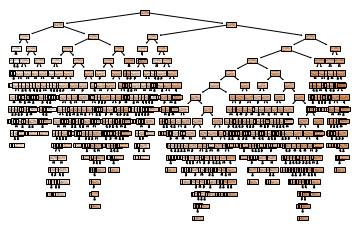

In [38]:
from sklearn import tree

# plot using sklearn's tree package
tree.plot_tree(rf_model.estimators_[0], feature_names=feature_list, filled=True)
plt.show()

## Save Model

In [ ]:
import pickle

# save model
filename = 'rf_reg_model.sav'
pickle.dump(rf_model, open(filename, 'wb'))

In [ ]:
# save model
filename = 'rf_reg_model.sav'
pickle.dump(rf_model, open(filename, 'wb'))

In [ ]:
# save model
filename = 'rf_reg_model.sav'
pickle.dump(rf_model, open(filename, 'wb'))

In [ ]:
# save model
filename = 'rf_reg_model.sav'
pickle.dump(rf_model, open(filename, 'wb'))